## To identify the Terrorist Organization based on the Terrorism Incident Info.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, \
                            precision_score, recall_score
SEED = 42
np.random.seed(SEED)
import time

### Loading the Data
Loading Global Terrorism Dataset from CSV file

In [2]:
# Load the dataset
df_bl = pd.read_csv("baseline_data.csv")

### Step 1: Data Preparation

#### Pick relevant features

In [3]:
#pick features for Baseline Model
baseline_features = ['latitude','longitude','success','suicide','attacktype1','targtype1','claimed','nkill','nkillus','nkillter','nwound','nwoundus','ishostkid']

In [7]:
df_bl[baseline_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12295 entries, 0 to 12294
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   latitude     12295 non-null  float64
 1   longitude    12295 non-null  float64
 2   success      12295 non-null  int64  
 3   suicide      12295 non-null  int64  
 4   attacktype1  12295 non-null  int64  
 5   targtype1    12295 non-null  int64  
 6   claimed      12295 non-null  int64  
 7   nkill        12295 non-null  int64  
 8   nkillus      12295 non-null  int64  
 9   nkillter     12295 non-null  int64  
 10  nwound       12295 non-null  int64  
 11  nwoundus     12295 non-null  int64  
 12  ishostkid    12295 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1.2 MB


#### Map Labels

In [4]:
# Update gname(Terrorist Organization) column to numerical
df_bl['gname'] = df_bl['gname'].map({'Islamic State of Iraq and the Levant (ISIL)':0,'Taliban':1,'Taliban (Pakistan)':1,'Boko Haram':2,'Al-Qaida':3,'Al-Qaida in Iraq':3,'Al-Qaida in Saudi Arabia':3,'Al-Qaida in the Arabian Peninsula (AQAP)':3,'Al-Qaida in the Islamic Maghreb (AQIM)':3,'Al-Qaida in Yemen':3,'Al-Qaida Kurdish Battalions (AQKB)':3,'Al-Shabaab':4,'Tehrik-i-Taliban Pakistan (TTP)':5,'Al-Nusrah Front':6,'Fulani extremists':7,'Houthi extremists (Ansar Allah)':8,'Liberation Tigers of Tamil Eelam (LTTE)':9, 'Sympathizers of Al-Qaida Organization':3,'Islambouli Brigades of al-Qaida':3, 'Al-Qaida Organization for Jihad in Sweden':3,'Jadid Al-Qaida Bangladesh (JAQB)':3,'':0})

#### Check NA

In [5]:
#check for null cells
print(df_bl[baseline_features].isna().any().any())
df_bl[baseline_features].isna().any()

False


latitude       False
longitude      False
success        False
suicide        False
attacktype1    False
targtype1      False
claimed        False
nkill          False
nkillus        False
nkillter       False
nwound         False
nwoundus       False
ishostkid      False
dtype: bool

#### One-Hot Encoding for feature attacktype1,targtype1

In [6]:
df_bl_one_hot = df_bl[baseline_features]

In [7]:
#one hot encoding for column attacktype1,targtype1
df_bl_one_hot = pd.get_dummies(df_bl_one_hot, columns = ['attacktype1','targtype1'])

In [8]:
df_bl_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12295 entries, 0 to 12294
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   latitude       12295 non-null  float64
 1   longitude      12295 non-null  float64
 2   success        12295 non-null  int64  
 3   suicide        12295 non-null  int64  
 4   claimed        12295 non-null  int64  
 5   nkill          12295 non-null  int64  
 6   nkillus        12295 non-null  int64  
 7   nkillter       12295 non-null  int64  
 8   nwound         12295 non-null  int64  
 9   nwoundus       12295 non-null  int64  
 10  ishostkid      12295 non-null  int64  
 11  attacktype1_1  12295 non-null  uint8  
 12  attacktype1_2  12295 non-null  uint8  
 13  attacktype1_3  12295 non-null  uint8  
 14  attacktype1_4  12295 non-null  uint8  
 15  attacktype1_5  12295 non-null  uint8  
 16  attacktype1_6  12295 non-null  uint8  
 17  attacktype1_7  12295 non-null  uint8  
 18  attack

### Step 2: Preparing the data for training and testing

1) Divide our independent and dependent variable into two separate variables.

2) Split the data into training and testing datasets.

In [9]:
# 1)

X = df_bl_one_hot # input
y = df_bl['gname'] # output (dependent variable)

In [10]:
# 2) Splitting our data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X ,y, 
                                                    test_size = 0.2, 
                                                    shuffle=True, 
                                                    stratify=y,
                                                    random_state=SEED)
# make sure stratify the y values!

#### Use MaxMinScaler to convert the negative values into positive

In [11]:
from sklearn.preprocessing import MinMaxScaler
# Scale the feature data so it has all positive values
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
df_bl_one_hot.columns

Index(['latitude', 'longitude', 'success', 'suicide', 'claimed', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'ishostkid',
       'attacktype1_1', 'attacktype1_2', 'attacktype1_3', 'attacktype1_4',
       'attacktype1_5', 'attacktype1_6', 'attacktype1_7', 'attacktype1_8',
       'attacktype1_9', 'targtype1_1', 'targtype1_2', 'targtype1_3',
       'targtype1_4', 'targtype1_6', 'targtype1_7', 'targtype1_8',
       'targtype1_9', 'targtype1_10', 'targtype1_11', 'targtype1_12',
       'targtype1_13', 'targtype1_14', 'targtype1_15', 'targtype1_16',
       'targtype1_17', 'targtype1_18', 'targtype1_19', 'targtype1_21',
       'targtype1_22'],
      dtype='object')

In [13]:
pd.DataFrame(X_train, columns=df_bl_one_hot.columns) 

,latitude,longitude,success,suicide,claimed,nkill,nkillus,nkillter,nwound,nwoundus,...,targtype1_12,targtype1_13,targtype1_14,targtype1_15,targtype1_16,targtype1_17,targtype1_18,targtype1_19,targtype1_21,targtype1_22
0,0.489400,0.405666,1.0,1.0,1.0,0.005970,0.0,0.007143,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.480021,0.409412,1.0,0.0,0.9,0.002985,0.0,0.007143,0.000667,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.724576,0.647737,1.0,0.0,1.0,0.007463,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.753063,0.538756,1.0,0.0,0.9,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.720380,0.543999,1.0,0.0,1.0,0.002985,0.0,0.000000,0.004667,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,0.529167,0.548069,0.0,0.0,0.9,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9832,0.385638,0.548074,1.0,0.0,1.0,0.001493,0.0,0.000000,0.000667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9833,0.791383,0.494457,1.0,1.0,0.9,0.156716,0.0,0.014286,0.163333,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9834,0.492551,0.413956,1.0,1.0,0.9,0.001493,0.0,0.007143,0.002000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
pd.DataFrame(X_train, columns=df_bl_one_hot.columns).describe()

,latitude,longitude,success,suicide,claimed,nkill,nkillus,nkillter,nwound,nwoundus,...,targtype1_12,targtype1_13,targtype1_14,targtype1_15,targtype1_16,targtype1_17,targtype1_18,targtype1_19,targtype1_21,targtype1_22
count,9836.000000,9836.000000,9836.000000,9836.000000,9836.000000,9836.000000,9836.000000,9836.000000,9836.000000,9836.000000,...,9836.000000,9836.000000,9836.000000,9836.000000,9836.00000,9836.000000,9836.000000,9836.000000,9836.000000,9836.000000
mean,0.653321,0.570491,0.914091,0.148231,0.945567,0.006831,0.000300,0.007356,0.004046,0.000742,...,0.006608,0.001220,0.364376,0.027349,0.00488,0.032839,0.000813,0.017182,0.009862,0.003965
std,0.126806,0.078087,0.280244,0.355347,0.072290,0.021191,0.010917,0.028539,0.015377,0.020429,...,0.081027,0.034909,0.481279,0.163105,0.06969,0.178223,0.028509,0.129955,0.098820,0.062847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.527742,0.539500,1.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.720380,0.547546,1.000000,0.000000,0.900000,0.002985,0.000000,0.000000,0.000667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735568,0.641219,1.000000,0.000000,1.000000,0.007463,0.000000,0.007143,0.003333,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


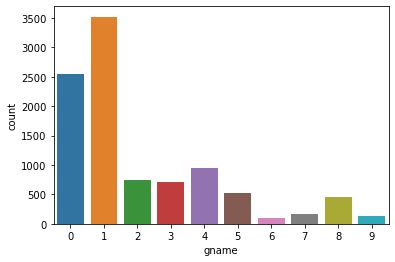

In [15]:
_ = sns.countplot(x=y_train)

### Step 3: Training & Fine-tuning the model

classifier_01:MultinomialNB()<br>
classifier_011:MultinomialNB(),Grid Search to fine tune the hyperparameter<br>
classifier_02:GaussianNB()<br>
classifier_021:GaussianNB(),Grid Search to fine tune the hyperparameter<br>
classifier_022:GaussianNB(),Grid Search to fine tune the hyperparameter

In [45]:
classifier_01 = MultinomialNB()
# Train the model
classifier_01.fit(X_train, y_train)

MultinomialNB()

In [46]:
# K-fold cross validation using s single scorer
from sklearn.model_selection import cross_val_score

scores_01 = cross_val_score(classifier_01, 
                         X_train, y_train, 
                         cv=5, 
                         scoring='f1_macro')
print('F1 scores:', scores_01)

F1 scores: [0.166632   0.16976951 0.1706029  0.17331354 0.15212213]


In [49]:
%%time
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
from sklearn.model_selection import GridSearchCV
classifier_011 = MultinomialNB()
param_grid_011 = {'alpha': [1, 0.1, 0.01, 0.001, 1e-4]}


gs_clf_011 = GridSearchCV(classifier_011,
                      param_grid_011, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_clf_011.fit(X_train, y_train)
print("'{}' gives the best F1-score at: {:.2%}".format(gs_clf_011.best_params_, gs_clf_011.best_score_))

'{'alpha': 0.0001}' gives the best F1-score at: 16.90%
Wall time: 6.36 s


In [53]:
# Training the final model using the best parameters from above fine-tuning
classifier_011 = MultinomialNB(alpha=0.0001)
classifier_011.fit(X_train, y_train)

MultinomialNB(alpha=0.0001)

In [62]:
classifier_02 = GaussianNB()
classifier_02.fit(X_train, y_train)

GaussianNB()

In [66]:
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
start = time.time()
classifier_021 = GaussianNB()
param_grid_021 = {'var_smoothing': np.logspace(0,-9, num=100)}


gs_clf_021 = GridSearchCV(classifier_021,
                      param_grid_021, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_clf_021.fit(X_train, y_train)
stop = time.time()
print("'{}' gives the best F1-score at: {:.2%}".format(gs_clf_021.best_params_, gs_clf_021.best_score_))
print(f"Training time: {stop - start}s")

'{'var_smoothing': 1.2328467394420658e-05}' gives the best F1-score at: 57.53%
Training time: 9.857648611068726s


In [67]:
classifier_021 = gs_clf_021.best_estimator_
classifier_021.fit(X_train, y_train)

GaussianNB(var_smoothing=1.2328467394420658e-05)

In [43]:
classifier_021 = GaussianNB(var_smoothing = 1.2328467394420658e-05)
classifier_021.fit(X_train, y_train)

GaussianNB(var_smoothing=1.2328467394420658e-05)

In [73]:
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
start = time.time()
classifier_022 = GaussianNB()
param_grid_022 = {'var_smoothing': np.logspace(0,-9, num=100)}


gs_clf_022 = GridSearchCV(classifier_022,
                      param_grid_022, 
                      cv=5,
                      scoring='roc_auc_ovr',
                      n_jobs=-1)
gs_clf_022.fit(X_train, y_train)
stop = time.time()
print("'{}' gives the best roc_auc_ovr at: {:.2%}".format(gs_clf_022.best_params_, gs_clf_022.best_score_))
print(f"Training time: {stop - start}s")

'{'var_smoothing': 2.848035868435799e-06}' gives the best roc_auc_ovr at: 93.80%
Training time: 6.127171277999878s


In [74]:
classifier_022 = gs_clf_022.best_estimator_
classifier_022.fit(X_train, y_train)

GaussianNB(var_smoothing=2.848035868435799e-06)

### Step 5: Testing the model

In [47]:
# Kept aside some data to test - X_test
y_pred_01 = classifier_01.predict(X_test)

compare_df_01 = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted_01 Output": y_pred_01})

In [48]:
compare_df_01.sample(20)

,Desired Output (Actuals),Predicted_01 Output
6582,0,0
5906,1,1
3321,3,0
1698,1,0
11913,0,0
220,1,5
11190,0,1
786,5,4
3601,1,1
10789,1,0


In [54]:
# Kept aside some data to test - X_test
y_pred_011 = classifier_011.predict(X_test)

compare_df_011 = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted_01 Output": y_pred_011})

In [55]:
compare_df_011.sample(20)

,Desired Output (Actuals),Predicted_01 Output
7907,2,0
12037,8,0
11691,5,0
11647,1,0
3446,1,1
644,5,1
11874,1,1
6593,4,4
8002,0,0
11568,1,1


In [63]:
# Kept aside some data to test - X_test
y_pred_02 = classifier_02.predict(X_test)

compare_df_02 = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted_01 Output": y_pred_02})

In [64]:
compare_df_02.sample(20)

,Desired Output (Actuals),Predicted_01 Output
6582,0,6
5906,1,0
3321,3,0
1698,1,5
11913,0,0
220,1,5
11190,0,0
786,5,4
3601,1,1
10789,1,5


In [44]:
# Kept aside some data to test - X_test
y_pred_021 = classifier_021.predict(X_test)

compare_df_021 = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted_01 Output": y_pred_021})

In [45]:
compare_df_021.sample(20)

,Desired Output (Actuals),Predicted_01 Output
6582,0,6
5906,1,1
3321,3,0
1698,1,5
11913,0,0
220,1,5
11190,0,0
786,5,3
3601,1,1
10789,1,5


In [75]:
# Kept aside some data to test - X_test
y_pred_022 = classifier_022.predict(X_test)

compare_df_022 = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted_01 Output": y_pred_022})

In [76]:
compare_df_022.sample(20)

,Desired Output (Actuals),Predicted_01 Output
6727,0,0
10814,1,5
9776,0,0
3172,1,5
445,1,5
7832,1,1
2829,1,5
629,1,1
922,5,5
1934,3,0


### Step 4: Evaluate the model

In [57]:
# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred_01))
print()

Classification report:

              precision    recall  f1-score   support

           0       0.41      0.67      0.51       637
           1       0.51      0.72      0.59       880
           2       0.43      0.10      0.16       188
           3       0.27      0.04      0.07       177
           4       0.69      0.21      0.32       236
           5       0.32      0.06      0.10       130
           6       0.00      0.00      0.00        24
           7       0.00      0.00      0.00        41
           8       0.33      0.03      0.05       113
           9       0.00      0.00      0.00        33

    accuracy                           0.47      2459
   macro avg       0.30      0.18      0.18      2459
weighted avg       0.44      0.47      0.40      2459




In [56]:
# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred_011))
print()

Classification report:

              precision    recall  f1-score   support

           0       0.41      0.67      0.51       637
           1       0.51      0.72      0.59       880
           2       0.44      0.11      0.17       188
           3       0.25      0.04      0.07       177
           4       0.66      0.21      0.32       236
           5       0.32      0.06      0.10       130
           6       0.00      0.00      0.00        24
           7       0.00      0.00      0.00        41
           8       0.33      0.03      0.05       113
           9       0.00      0.00      0.00        33

    accuracy                           0.47      2459
   macro avg       0.29      0.18      0.18      2459
weighted avg       0.44      0.47      0.40      2459




C:\Python\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred_02))
print()

Classification report:

              precision    recall  f1-score   support

           0       0.64      0.59      0.61       637
           1       0.84      0.04      0.07       880
           2       0.95      0.50      0.66       188
           3       0.32      0.10      0.15       177
           4       0.95      0.61      0.74       236
           5       0.14      0.90      0.24       130
           6       0.08      0.96      0.16        24
           7       0.19      0.98      0.32        41
           8       0.56      0.90      0.69       113
           9       1.00      0.91      0.95        33

    accuracy                           0.40      2459
   macro avg       0.57      0.65      0.46      2459
weighted avg       0.70      0.40      0.38      2459




In [46]:
# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred_021))
print()

Classification report:

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       637
           1       0.96      0.25      0.39       880
           2       0.97      0.51      0.67       188
           3       0.41      0.28      0.33       177
           4       0.98      0.91      0.94       236
           5       0.17      0.88      0.28       130
           6       0.22      0.92      0.36        24
           7       0.30      0.98      0.46        41
           8       0.65      0.96      0.78       113
           9       1.00      0.91      0.95        33

    accuracy                           0.58      2459
   macro avg       0.64      0.74      0.60      2459
weighted avg       0.80      0.58      0.59      2459




In [77]:
# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred_022))
print()

Classification report:

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       637
           1       0.95      0.19      0.31       880
           2       0.97      0.51      0.67       188
           3       0.38      0.21      0.27       177
           4       0.97      0.92      0.94       236
           5       0.16      0.89      0.27       130
           6       0.24      0.92      0.38        24
           7       0.30      0.98      0.46        41
           8       0.64      0.96      0.77       113
           9       1.00      0.91      0.95        33

    accuracy                           0.55      2459
   macro avg       0.64      0.73      0.58      2459
weighted avg       0.79      0.55      0.55      2459




In [47]:
# Confusion Matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred_021)

Confusion Matrix:


array([[522,   0,   0,  33,   3,   2,  76,   0,   1,   0],
       [ 82, 218,   0,  19,   0, 561,   0,   0,   0,   0],
       [  1,   0,  96,   0,   0,   0,   0,  91,   0,   0],
       [ 73,   1,   2,  49,   2,   1,   1,   2,  46,   0],
       [  0,   0,   0,   9, 215,   0,   0,   0,  12,   0],
       [  3,   8,   0,   5,   0, 114,   0,   0,   0,   0],
       [  1,   1,   0,   0,   0,   0,  22,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0,  40,   0,   0],
       [  2,   0,   0,   2,   0,   0,   0,   0, 109,   0],
       [  0,   0,   0,   2,   0,   1,   0,   0,   0,  30]], dtype=int64)

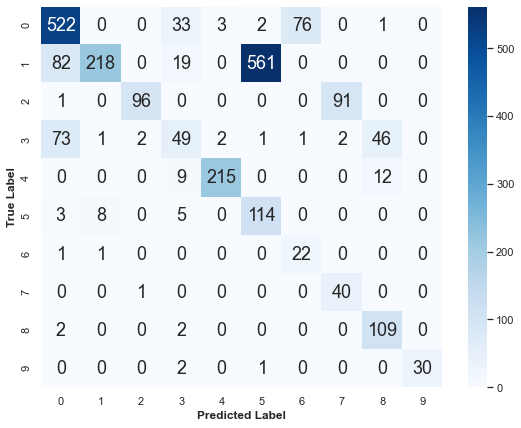

In [48]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))
_ = sns.heatmap(confusion_matrix(y_test, y_pred_021), 
                annot=True, annot_kws={"size": 18},
                cmap=plt.cm.Blues,fmt='g')
#                 ),xticklabels=class_names, yticklabels=class_names
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')